# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر کردن تصویر بر اساس رنگ</div>


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ابتدا جهت یاداوری طیف رنگی در HSV به ازای Hue های مختلف را ببینیم</div>

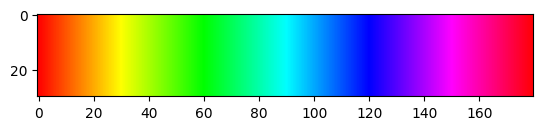

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

hue_spectrum = np.linspace(0, 179, dtype='uint8', num=180)
img = np.array([hue_spectrum]*30)
saturation_channel = np.ones_like(img, dtype='uint8')*255
value_channel = np.ones_like(img, dtype='uint8')*255

hsv = cv2.merge([img, saturation_channel, value_channel])
final_bgr_spectrum = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.imshow(final_bgr_spectrum[...,::-1])

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سعی کنید با تغییر value و saturation تغییرات طیف را مشاهده کنید!</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر رنگ زرد</div>

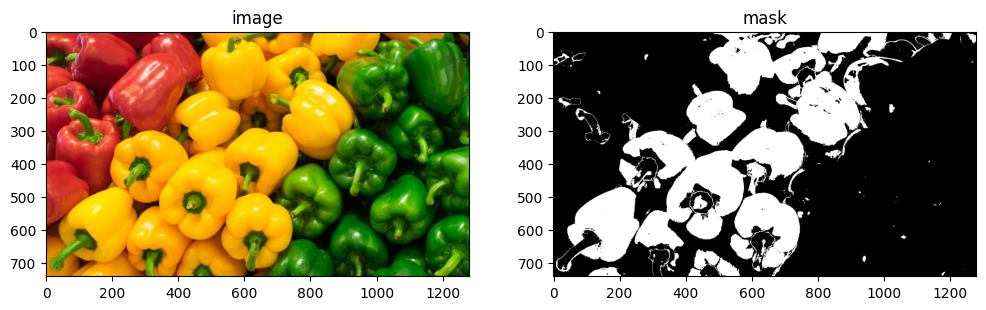

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('D:/felfel-dolme.jpg')

# define range of BLUE color in HSV
lower = np.array([20,50,50])
upper = np.array([35,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use inRange to capture only the values between lower & upper 
mask = cv2.inRange(hsv_img, lower, upper)

#show
plt.figure(figsize=[12,6])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(122);plt.imshow(mask,cmap='gray');plt.title("mask");


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر رنگ قرمز</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">توجه کنید رنگ قرمز هم انتهای طیف و هم ابتدای طیف است!!</div>

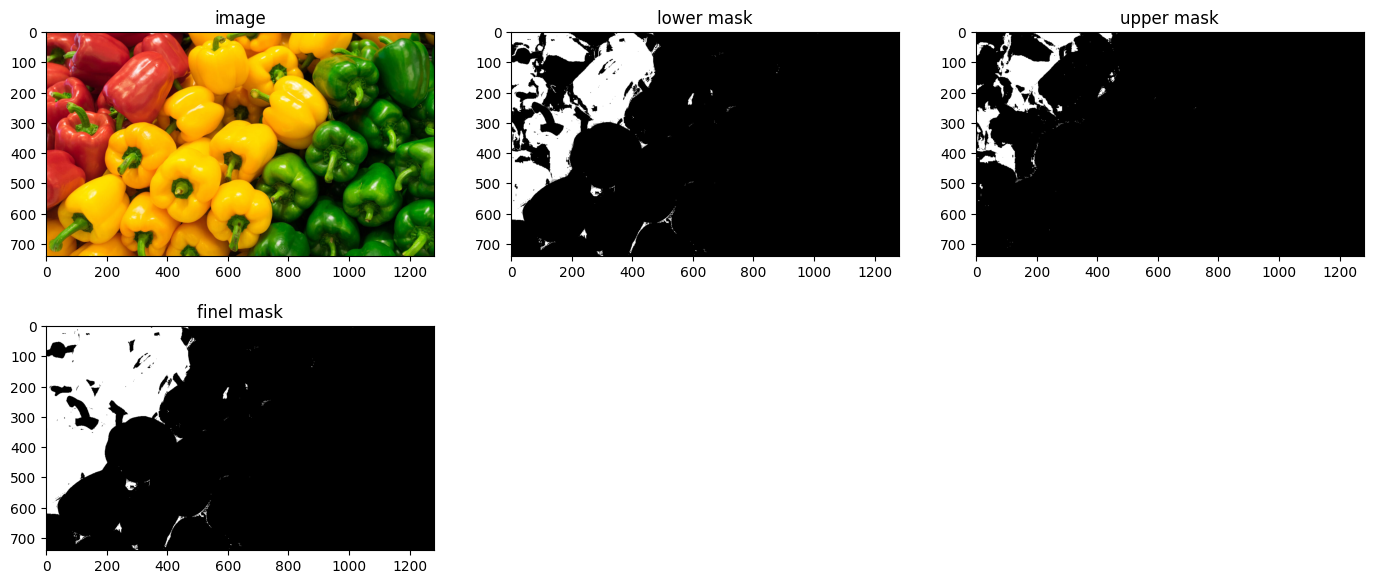

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('D:/felfel-dolme.jpg')
# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([160,50,50])
upper_red = np.array([179,255,255])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

# join masks
mask = mask0+mask1

#show
plt.figure(figsize=[17,7])
plt.subplot(231);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(232);plt.imshow(mask0,cmap='gray');plt.title("lower mask");
plt.subplot(233);plt.imshow(mask1,cmap='gray');plt.title("upper mask");
plt.subplot(234);plt.imshow(mask,cmap='gray');plt.title("finel mask");


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش قسمت قرمز در تصویر با عملیات بیتی با ماسک به دست آمده</div>


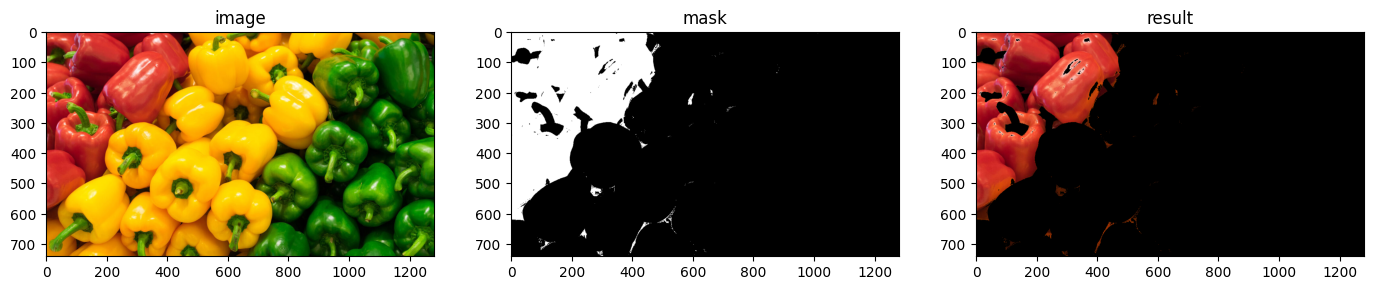

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('D:/felfel-dolme.jpg')
# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([160,50,50])
upper_red = np.array([179,255,255])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

# join masks
mask = mask0+mask1

#result
mask_3channel = cv2.merge([mask]*3)
result = cv2.bitwise_and(image, mask_3channel)

#show
plt.figure(figsize=[17,7])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(mask_3channel);plt.title("mask");
plt.subplot(133);plt.imshow(result[...,::-1]);plt.title("result");


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">میتوانیم به جای
</div>

```
mask_3channel = cv2.merge([mask]*3)
result = cv2.bitwise_and(image, mask_3channel)
```

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بنویسیم:
</div>

```
result = cv2.bitwise_and(image,image, mask=mask)
```


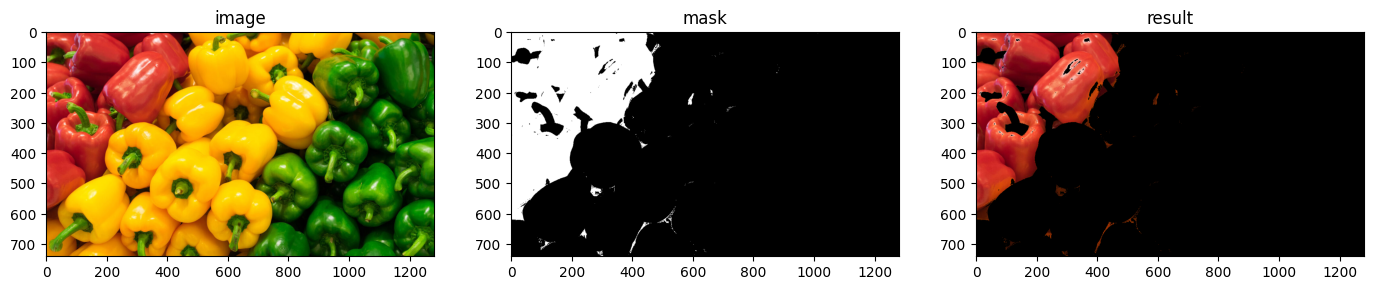

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('D:/felfel-dolme.jpg')
# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([160,50,50])
upper_red = np.array([179,255,255])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

# join masks
mask = mask0+mask1

#result
result = cv2.bitwise_and(image,image, mask=mask)

#show
plt.figure(figsize=[17,7])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(133);plt.imshow(result[...,::-1]);plt.title("result");


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">به عنوان تمرین نواحی سبز را فیلتر کنید!
</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فیلتر نواحی قرمز برای تشخیص پوست!</div>


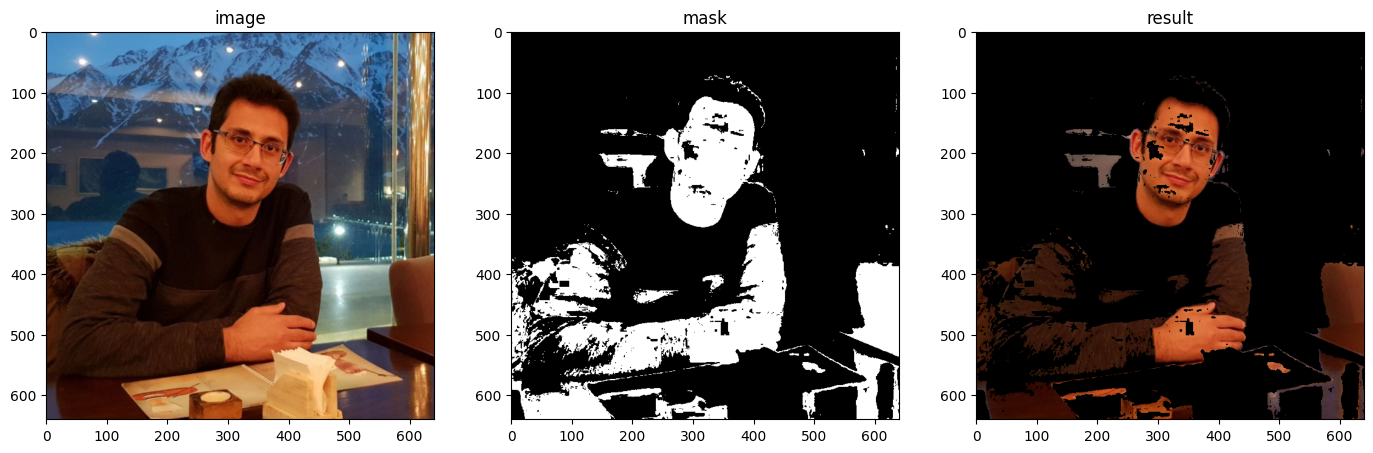

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('D:/akhavan.jpg')
# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([160,50,50])
upper_red = np.array([179,255,255])
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

# join masks
mask = mask0+mask1

#result
result = cv2.bitwise_and(image,image, mask=mask)

#show
plt.figure(figsize=[17,7])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("image");
plt.subplot(132);plt.imshow(mask, cmap='gray');plt.title("mask");
plt.subplot(133);plt.imshow(result[...,::-1]);plt.title("result");
